<a href="https://colab.research.google.com/github/Maheshwar405/Maheshwar-Reddy_INFO5731_Fall2023/blob/main/Boyalla_Maheshwar_Reddy_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster.


In [1]:
pip install gensim

In [9]:
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

In [10]:
from gensim.models.phrases import Phraser
import nltk
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gensim
import spacy
from gensim.utils import simple_preprocess
#from gensim.models import Phrases, Phraser, LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint
import nltk

# Ignore warnings
warnings.filterwarnings("ignore")

# Load Spacy model for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Download NLTK stopwords
nltk.download('stopwords')

# Set display options
pd.options.display.max_columns = 999

# Read data from CSV
data = pd.read_csv("Reviews11.csv", encoding='utf-8')

# Select relevant column (adjust column index as needed)
text_data = data.iloc[:, 1]

# Function to convert sentences to words
def sent_to_words(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

# Convert data to a list of words
data_words = list(sent_to_words(text_data))

# Build bigram and trigram models
bigram = Phrases(data_words, min_count=5, threshold=100)
trigram = Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Function to remove stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Function to make bigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Function to make trigrams
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Function for lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove stopwords
data_words_nostops = remove_stopwords(data_words)

# Form bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Lemmatization
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

# Create Dictionary
id2word = Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=10,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# Print the Keywords in the 10 topics
pprint(lda_model.print_topics())

# Get document topics
doc_lda = lda_model[corpus]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['person', 'see', 'hype', 'claim', 'masterpiece', 'overreact', 'overblown', 'excitement', 'joker', 'base', 'film', 'think', 'look', 'solid', 'good', 'even', 'bit', 'pretentious', 'trailer', 'say', 'incredibly', 'wrong', 'massive', 'achievement', 'cinema', 's', 'extremely', 'rare', 'day', 'age', 'nonsense', 'reboot', 'somewhat', 'reboot', 'sort', 'standalone', 'origin', 'tale', 'impeccable', 'start', 'finish', 'echo', 'resemblance', 'good', 'origin', 'comic_strip', 'bleed', 'sweat', 'cry', 'drop', 'magnificently', 'dedicated', 'performance', 'heath_ledger', 'proud', 'undoubtedly', 'great', 'act', 'performance', 'direct', 'write', 'slickly', 'brilliant', 'bleak', 'setting', 'tone', 'palpable', 'film', 'place', 'blow', 'away', 'audience', 'member', 'witness', 'film', 'still', 'transport', 'character', 'believe', 'hype', 'go', 'revere', 'transcend', 'masterpiece', 'cinema']]
[(0,
  '0.020*"movie" + 0.013*"joker" + 0.010*"see" + 0.010*"perfect" + '
  '0.010*"show" + 0.010*"story" + 0.010*"

In [ ]:
Topic -1 discuss about, How good joker movie is.
Topic -2 Is about comic book
Topic -3 Is about mental illness
TOpic -4 Is about Cinematic Feel of movie joker.
Topic -5 Is about Joker movie Hype
Topic -6 Is about joker character in the movie.
Topic -7 Is about joaquin acting in the movie joker.
Topic -8 Is about Joker movie comparison with someother.
Topic -9 Is about joker Movie story.
Topic -10 Joker movie Cinematography

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [12]:
# Write your code here
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import classification_report

In [13]:
# Load the dataset
data = pd.read_csv("Reviews11.csv", encoding='utf-8')

In [14]:
data.head()

,document_id,Cleaned_text,sentiment
0,0,person saw hype claims masterpiece overreactin...,positive
1,1,every movie comes truly makes impact joaquins ...,positive
2,2,movie felt alone isolated truly relate underst...,positive
3,3,truly masterpiece best hollywood film one best...,positive
4,4,time movies anticipated like end falling short...,positive


In [15]:
# Encode the sentiment labels using LabelEncoder
le = LabelEncoder()
data["sentiment"] = le.fit_transform(data["sentiment"])

In [16]:
# TF-IDF vectorization of text data
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['Cleaned_text'].apply(lambda x: np.str_(x)))
y = data['sentiment']

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=202)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 2162)
X_test shape: (20, 2162)
y_train shape: (80,)
y_test shape: (20,)


In [18]:
# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
predictions_nb = nb_classifier.predict(X_test)

In [19]:
# Evaluate Naive Bayes model
cr_nb = classification_report(y_test, predictions_nb)
print("Naive Bayes Classification Report:\n", cr_nb)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.67      0.80         6
           2       0.50      1.00      0.67         8

    accuracy                           0.60        20
   macro avg       0.50      0.56      0.49        20
weighted avg       0.50      0.60      0.51        20



In [20]:
# Cross-validation for Naive Bayes
accuracies_nb = cross_val_score(estimator=nb_classifier, X=X_train, y=y_train, cv=10)
print(f"Accuracy of the Naive Bayes Model: {round(accuracies_nb.mean() * 100)}%")

Accuracy of the Naive Bayes Model: 62%


In [21]:
# Train a Support Vector Machine (SVM) classifier
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
predictions_svm = svm_classifier.predict(X_test)

In [22]:
# Evaluate SVM model
cr_svm = classification_report(y_test, predictions_svm)
print("SVM Classification Report:\n", cr_svm)

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      0.67      0.80         6
           2       0.62      1.00      0.76         8

    accuracy                           0.75        20
   macro avg       0.87      0.72      0.74        20
weighted avg       0.85      0.75      0.74        20



In [23]:
# Cross-validation for SVM
accuracies_svm = cross_val_score(estimator=svm_classifier, X=X_train, y=y_train, cv=10)
print(f"Accuracy of the SVM Model: {round(accuracies_svm.mean() * 100)}%")

Accuracy of the SVM Model: 72%


Upon an in-depth evaluation employing 10-fold cross-validation, the Support Vector Machine (SVM) model demonstrates a commendable accuracy of 72 percent. In contrast, the Naive Bayes model achieves an accuracy of 62 percent. This stark contrast in performance signifies the SVM model's supremacy in effectively categorizing tweets into distinct sentiment categories. The discernible advantage of the SVM model underscores its robust capability to discern nuanced patterns within the tweet data, surpassing the Naive Bayes model in this specific classification task. This outcome implies that, when confronted with the intricate task of categorizing tweets based on sentiment, the SVM model proves to be a more reliable and accurate choice compared to the Naive Bayes approach.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.


In [24]:
# Write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [25]:
# Load the training and test data
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')

In [26]:
# Check the structure and missing values
print(df.head())
print(df1.head())
print(df.info())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [27]:
print(df.shape)
print(df1.shape)
print(df.isnull().sum())

(1460, 81)
(1459, 80)
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [28]:
# Impute missing values in numerical columns for training data
train_numerical_data = [var for var in df.columns if df[var].dtype == 'float']
for i in train_numerical_data:
    df[i].fillna(value=df[i].mean(), inplace=True)

In [29]:
# Impute missing values in numerical columns for test data
test_numerical_data = [var for var in df1.columns if df1[var].dtype == 'float']
for i in test_numerical_data:
    df1[i].fillna(value=df1[i].mean(), inplace=True)

In [30]:
# Check for missing values after imputation
print(df.isnull().sum())
print(df1.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


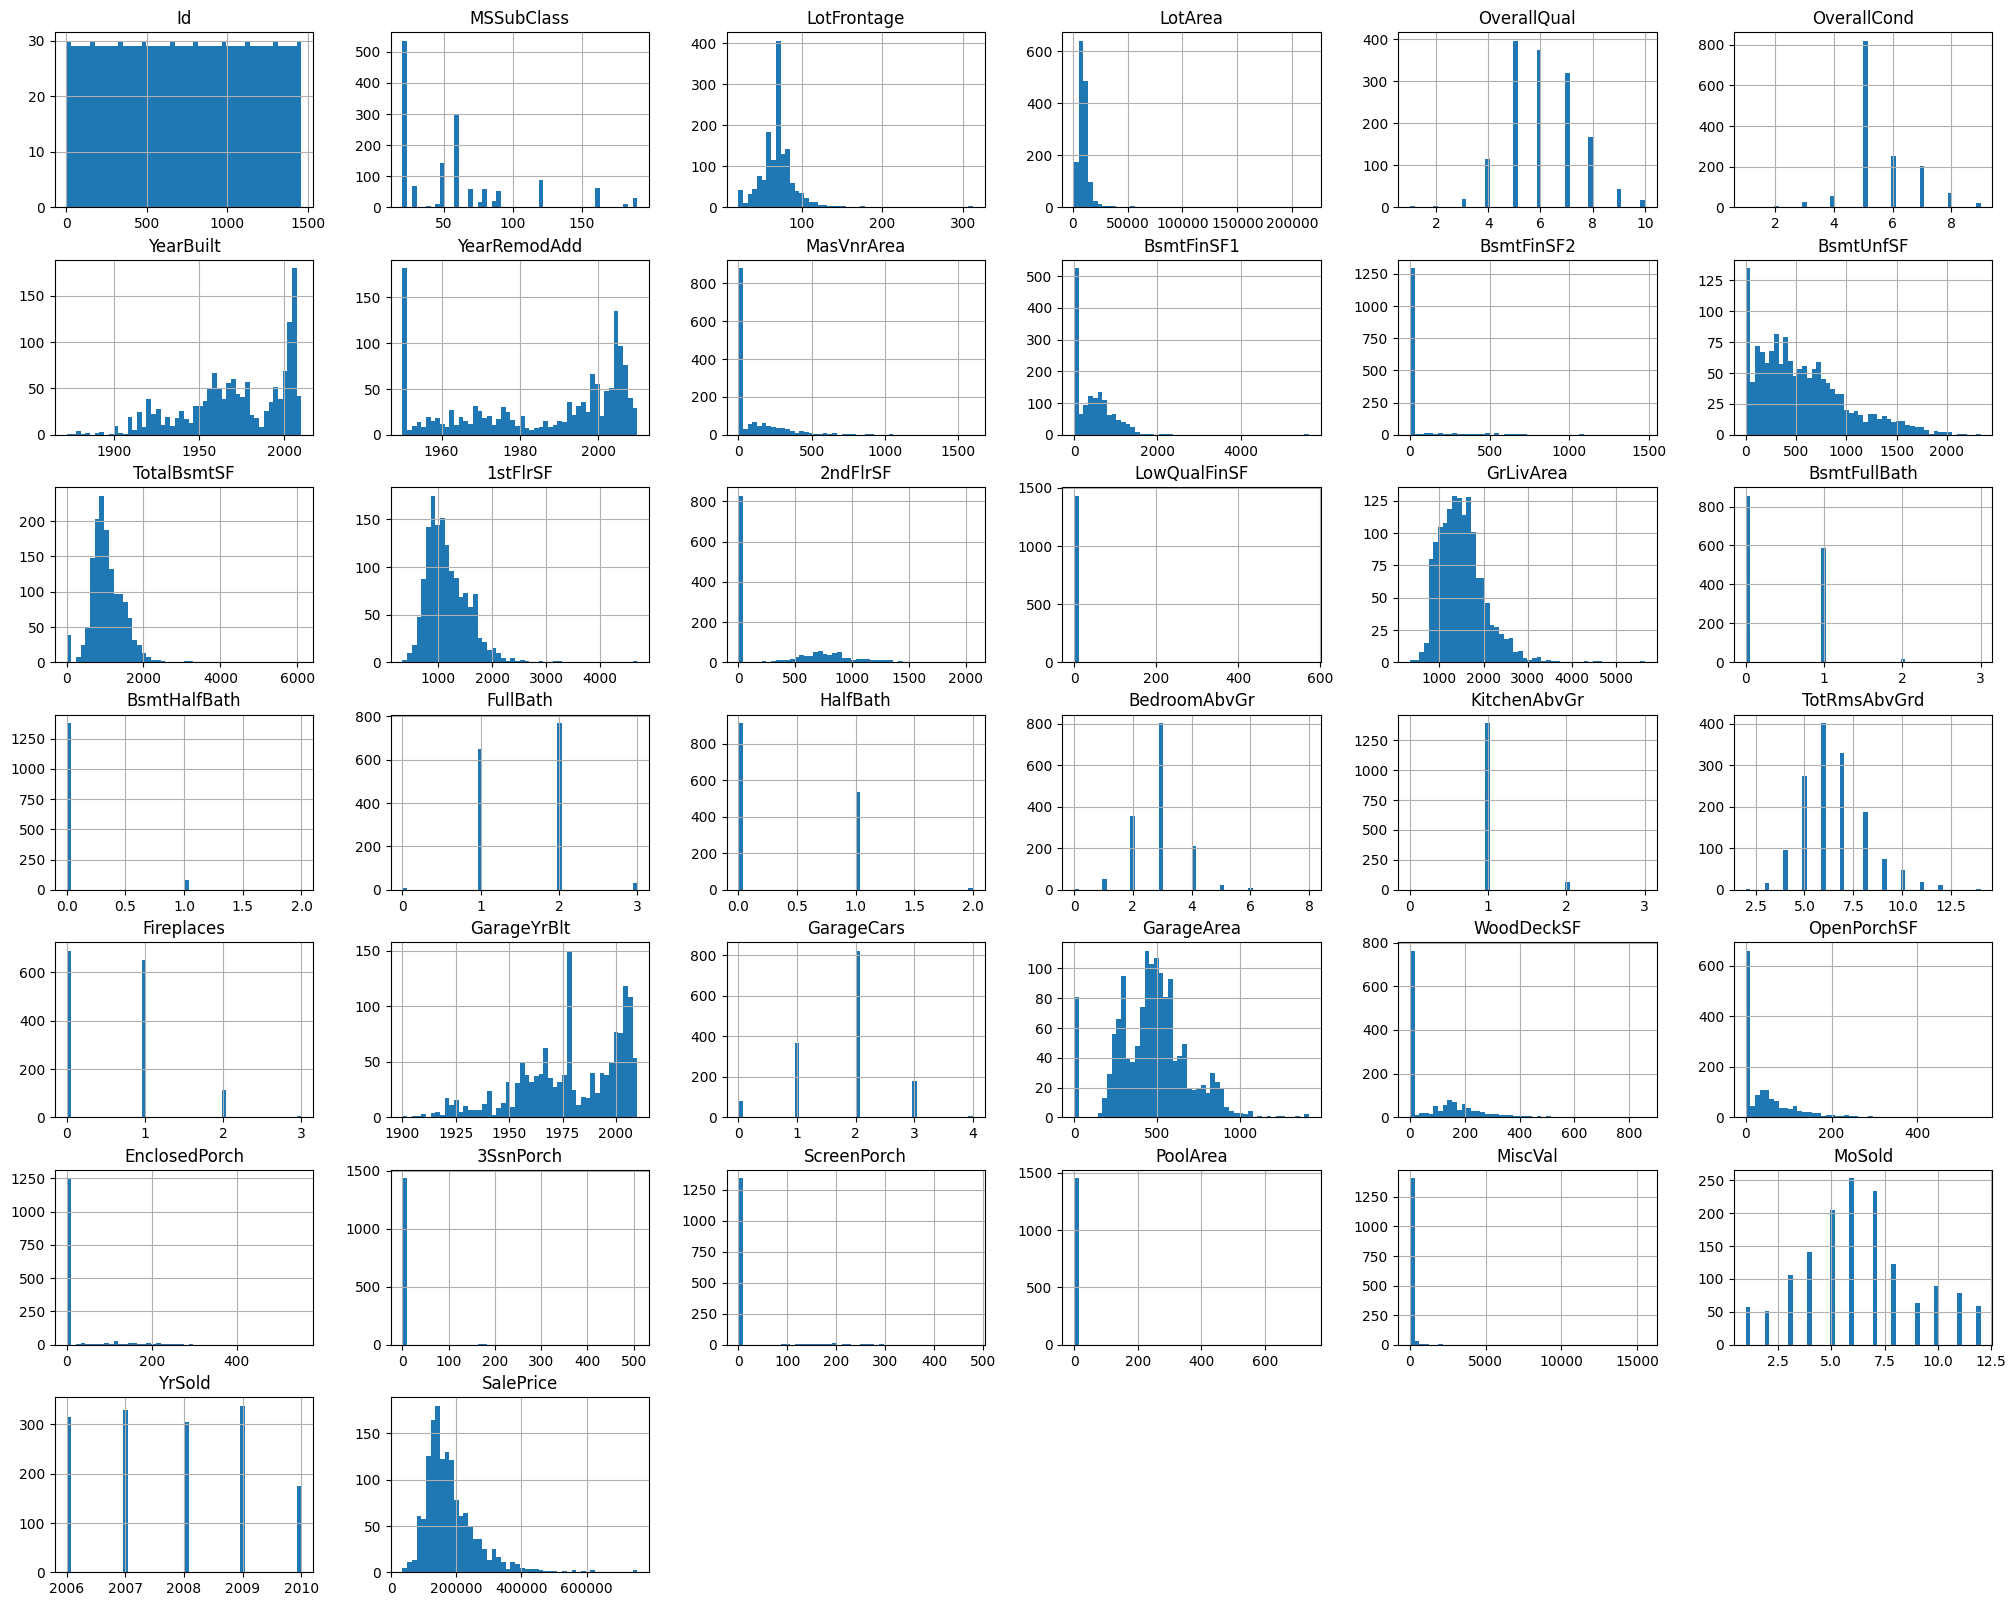

In [31]:
# Exploratory Data Analysis (EDA)
df.hist(bins=50, figsize=(25, 20))
plt.show()

array([[<Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='1stFlrSF', ylabel='OverallQual'>,
        <Axes: xlabel='FullBath', ylabel='OverallQual'>,
        <Axes: xlabel='YearBuilt', ylabel='OverallQual'>],
       [<Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageCars', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageArea', ylabel='GrLivArea'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='GrLivArea'>,
        <Axes: xlabel='1stFlrSF', ylabel='GrLivArea'>,
        <Axes: xlabel='FullBath', ylabel='GrLivArea'>,
        <Axes: xlabel='YearBuilt', ylabel='GrLivArea'>],
       [<Axes: xlabel='OverallQual', ylabel='GarageCars'>,
        <Axes: xlab

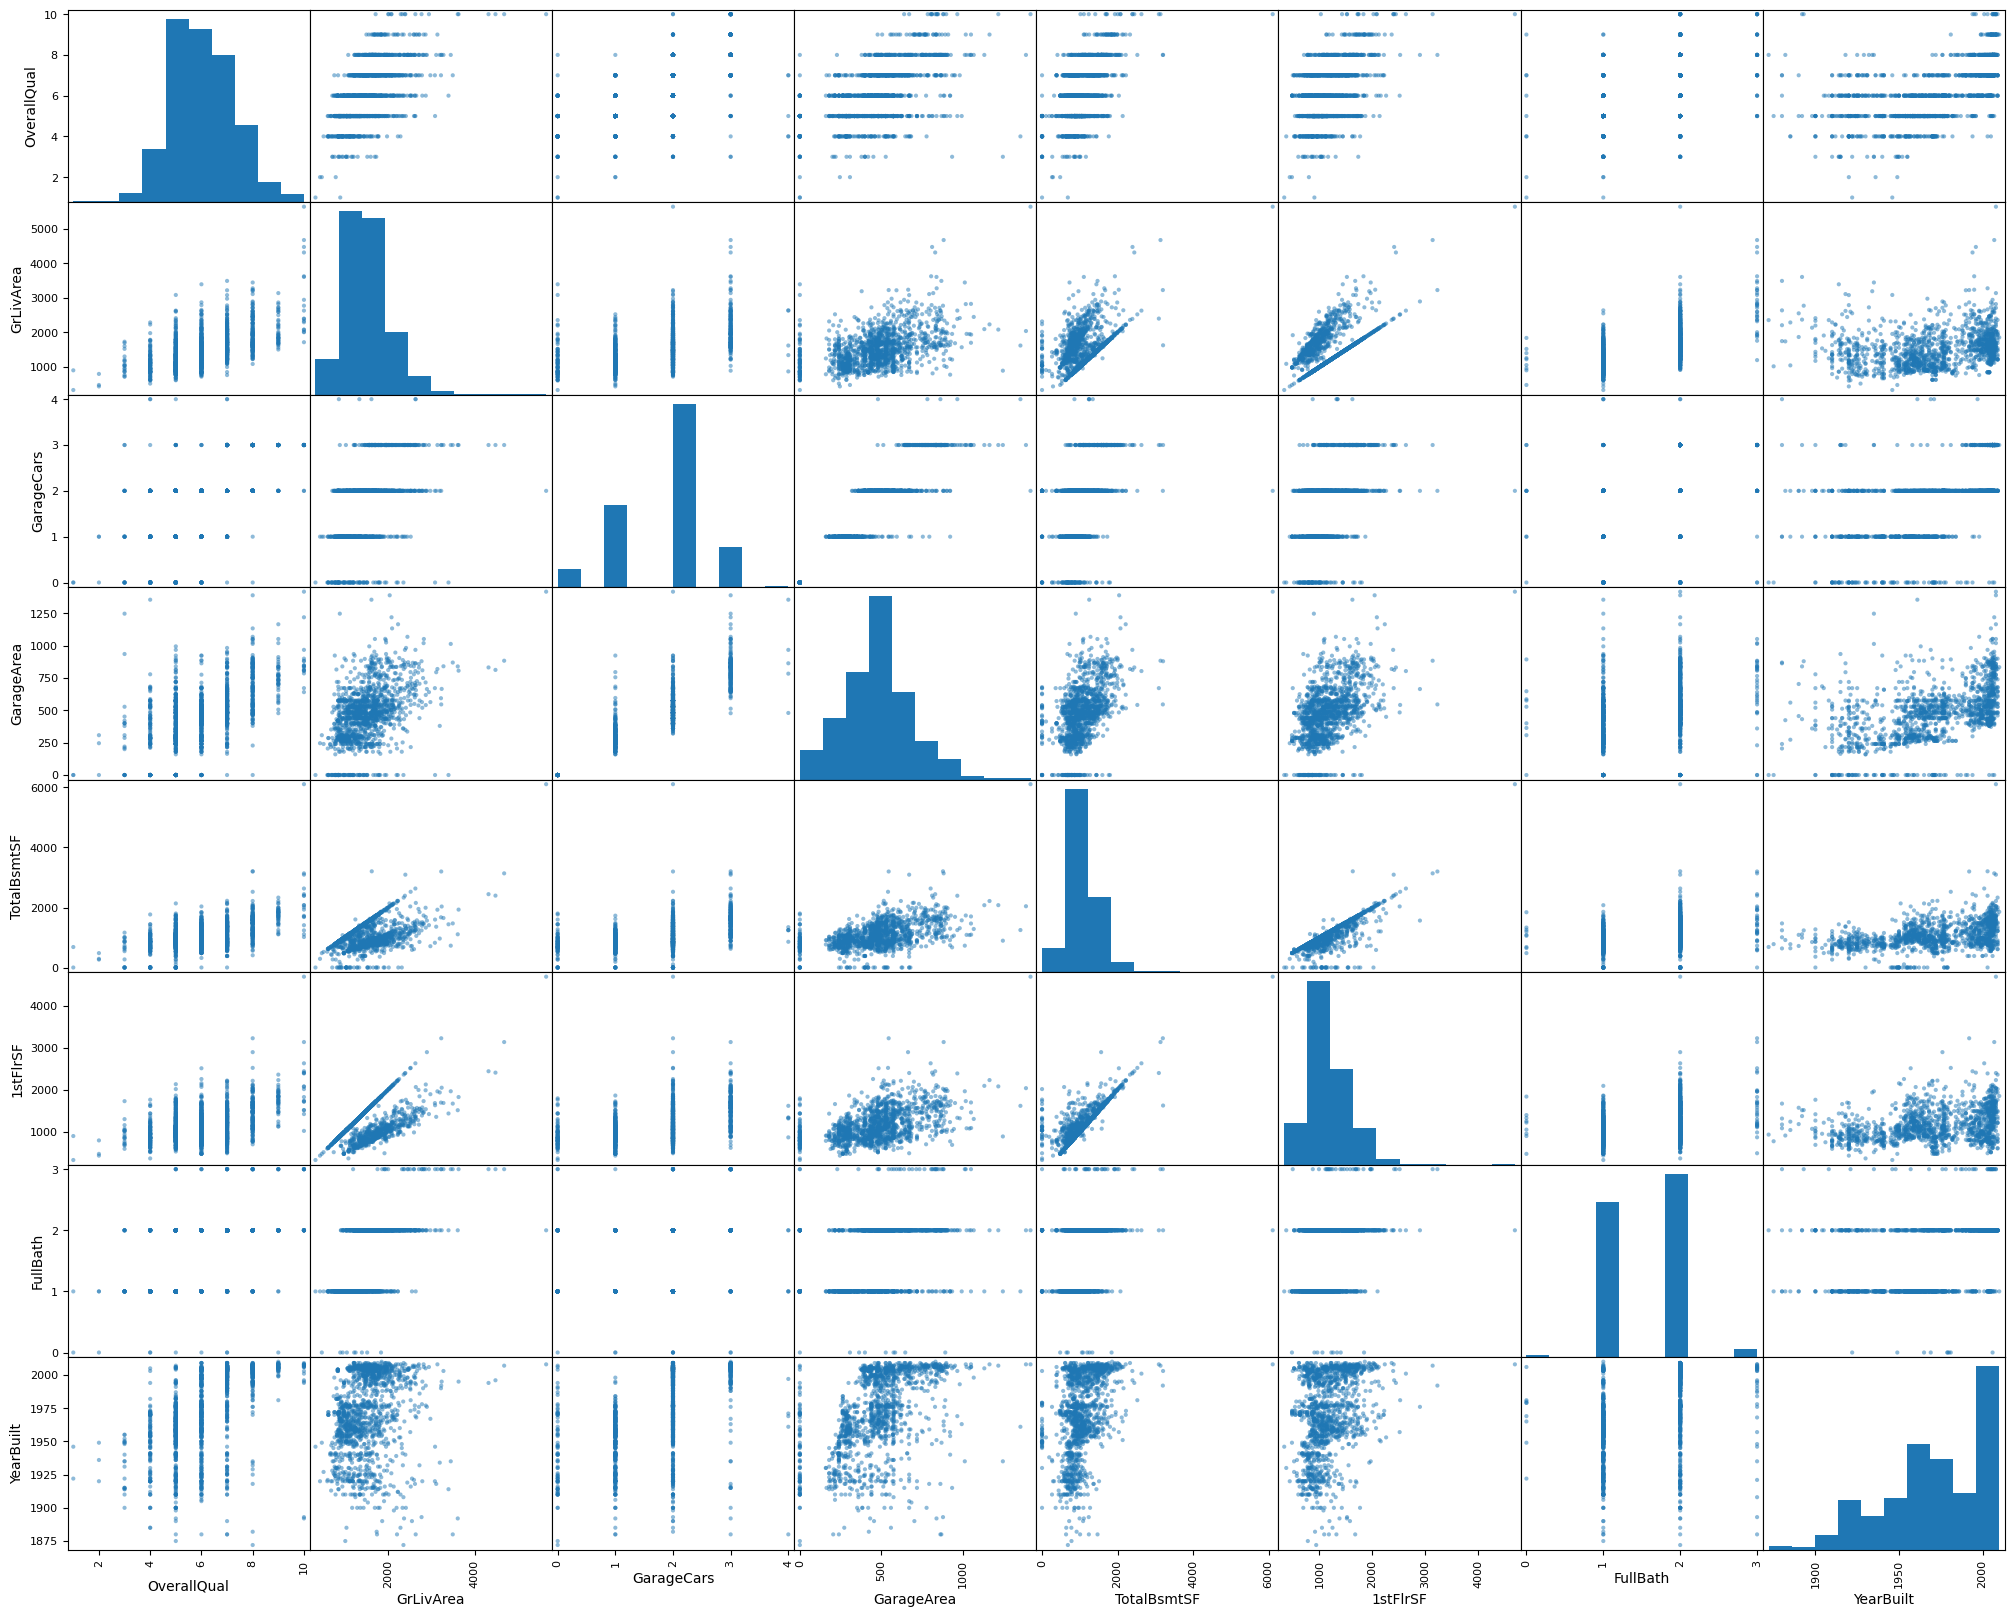

In [32]:
attributes = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "YearBuilt"]
scatter_matrix(df[attributes], figsize=(25, 20))

<Axes: >

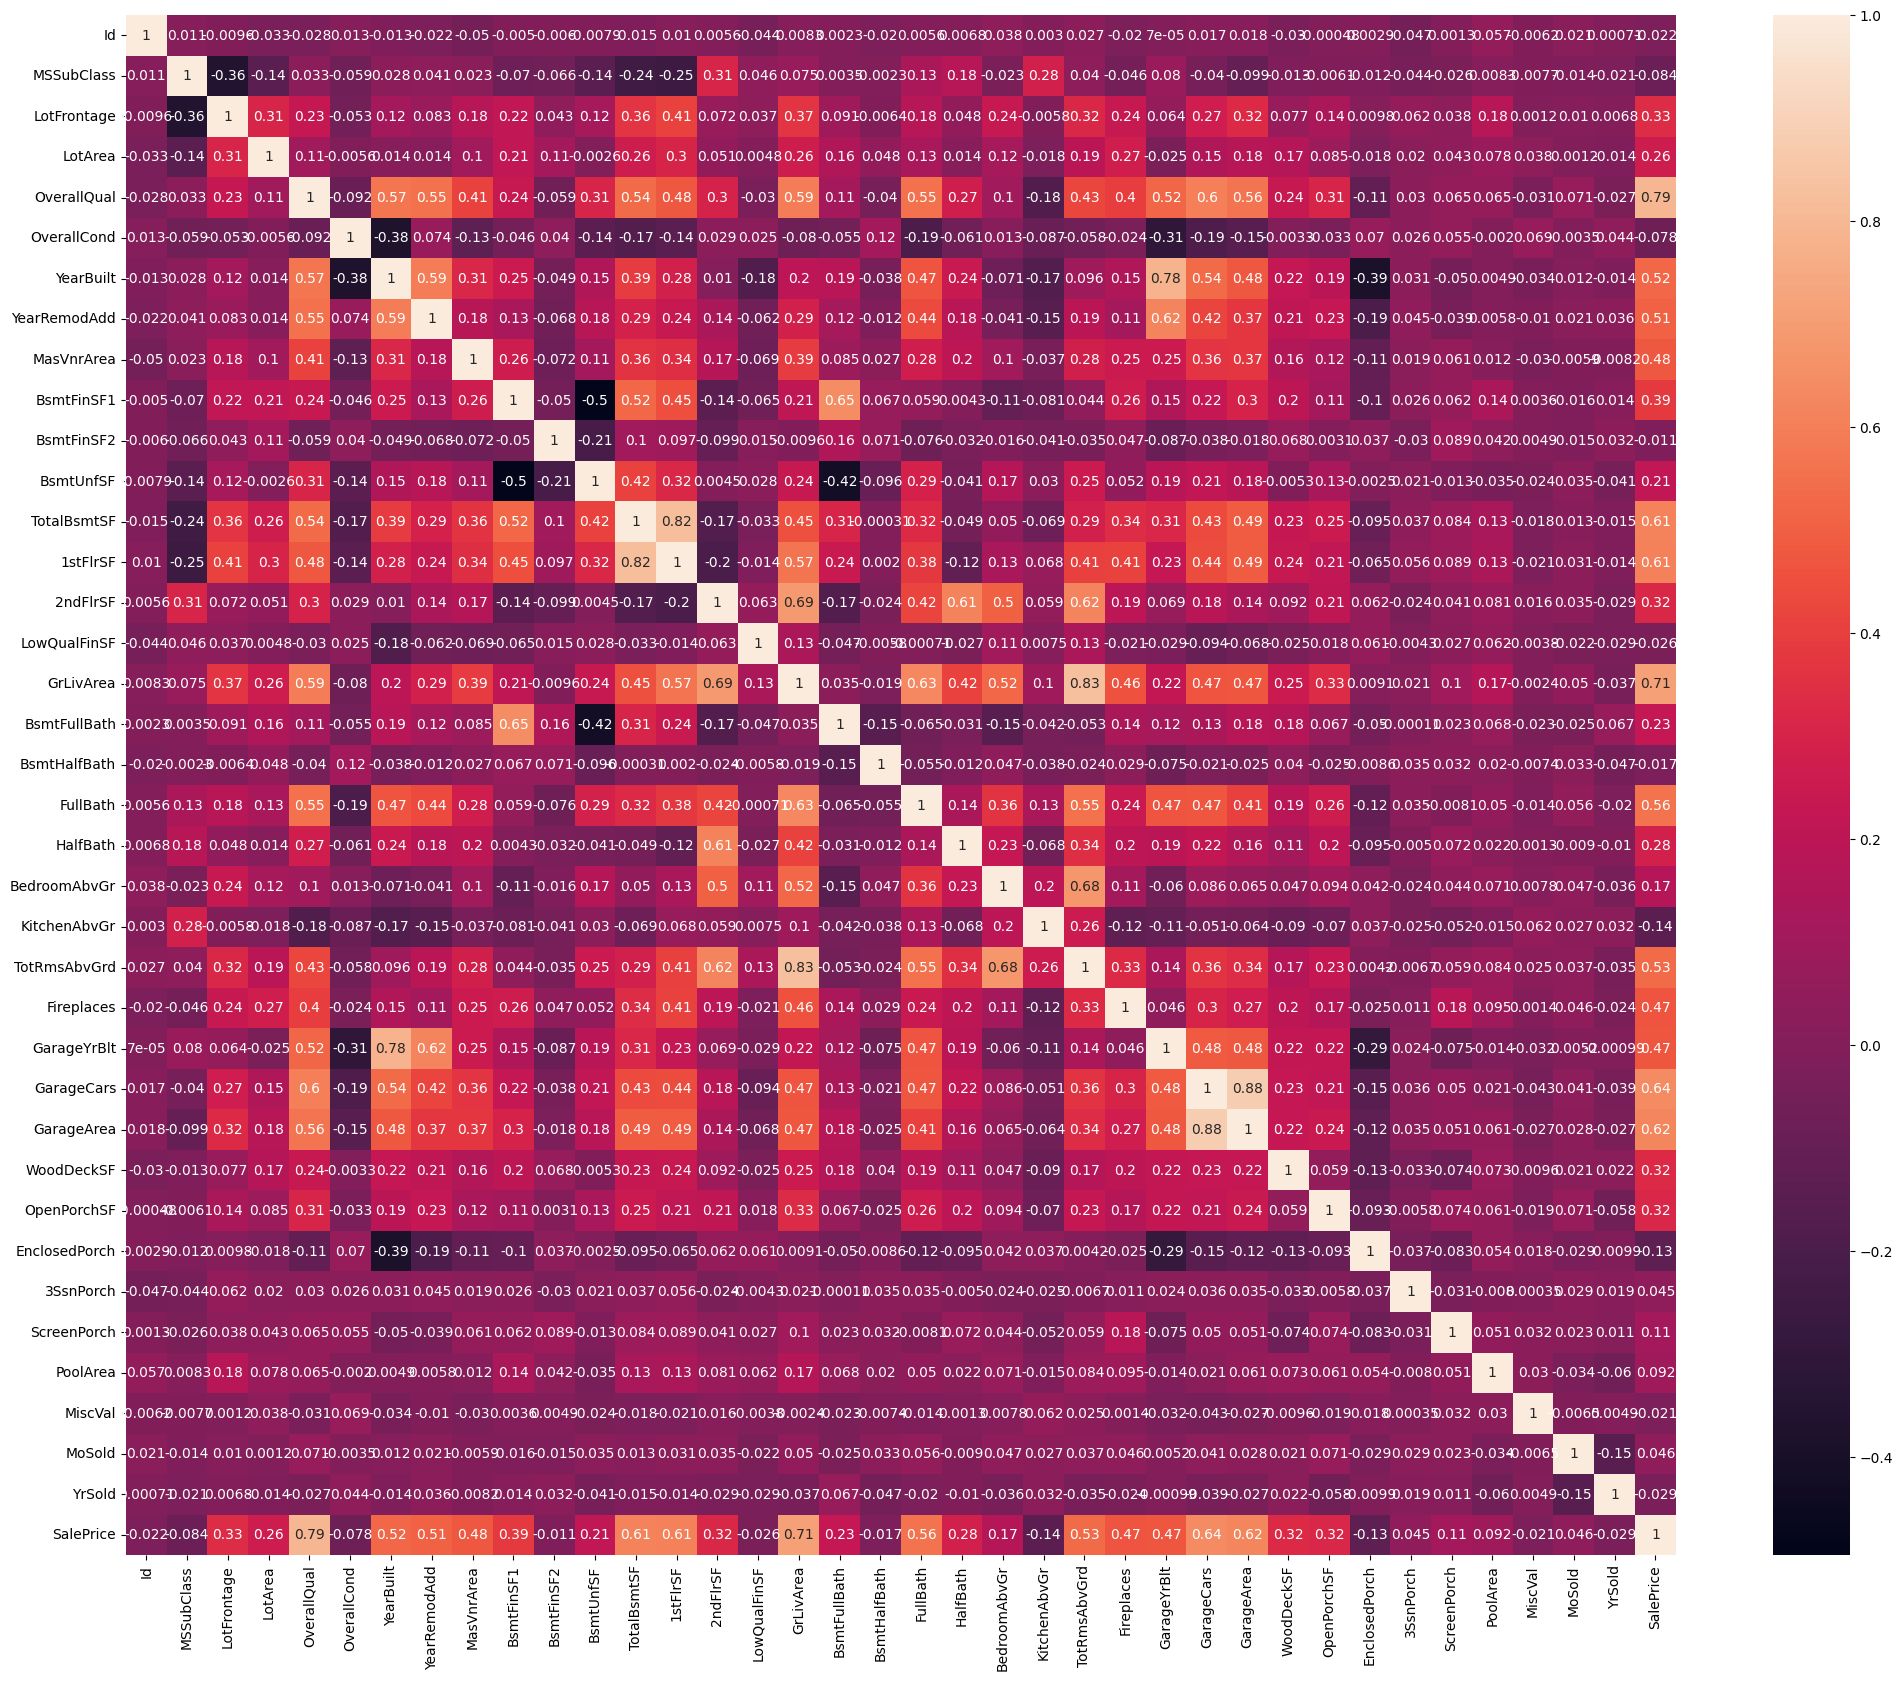

In [33]:
# Correlation analysis
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True)

In [34]:
to_drop = ['GarageArea', 'YrSold']
to_drop1 = ['GarageArea', 'YrSold','SaleCondition']
print("The attributes that needs to be dropped are:\n ",to_drop)

The attributes that needs to be dropped are:
  ['GarageArea', 'YrSold']


In [35]:
#Dropping the ID and the correlated attributes from the training and test set
df.drop(columns = to_drop1, axis = 1, inplace = True)
df1.drop(columns = to_drop, axis = 1, inplace = True)
# dropping id attributes
df.drop(labels = ['Id'], axis = 1, inplace = True)
df1.drop(labels = ['Id'], axis = 1, inplace = True)

In [36]:
#Label encoding the data in both training and testing sets
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    encoder = LabelEncoder()
    encoder.fit(list(df[column].values))
    df[column] = encoder.transform(list(df[column].values))

In [37]:
for column in df1.columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(df1[column].values))
    df1[column] = encoder_test.transform(list(df1[column].values))

In [38]:
print(df1.iloc[:,:-1])

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0              0         2           57      777       1      2         3   
1              0         3           58      964       1      2         0   
2              5         3           51      947       1      2         0   
3              5         3           55      587       1      2         0   
4             11         3           19      118       1      2         0   
...          ...       ...          ...      ...     ...    ...       ...   
1454          13         4            0       19       1      2         3   
1455          13         4            0       17       1      2         3   
1456           0         3          113     1069       1      2         3   
1457           9         3           38      647       1      2         3   
1458           5         3           51      536       1      2         3   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition

In [39]:
x_train = df.iloc[:,:-1]
y_train = df.iloc[:,-1]
x_test = df1.iloc[:,:-1]

In [40]:
print("Training Features:", x_train.columns.tolist())
print("Testing Features:", x_test.columns.tolist())


Training Features: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)

In [42]:
print("R-Square Value: ", lr.score(x_train,y_train))

R-Square Value:  0.9161268446883012


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **pre-trained Large Language Model (LLM) from the Hugging Face Repository** for your specific task using the data collected in Assignment 3. After creating an account on Hugging Face (https://huggingface.co/), choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any Meta based text analysis model. Provide a brief description of the selected LLM, including its original sources, significant parameters, and any task-specific fine-tuning if applied.

Perform a detailed analysis of the LLM's performance on your task, including key metrics, strengths, and limitations. Additionally, discuss any challenges encountered during the implementation and potential strategies for improvement. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [45]:
# Write your code here
# Created account in Hygging Face

In [46]:
pip install transformers


In [47]:
from transformers import BertTokenizer, BertForSequenceClassification

model_name = "bert-base-uncased"  # Replace with your chosen model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
pip install torch

In [51]:
import torch

In [52]:
# Example code for predicting sentiments
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertForSequenceClassification, BertTokenizer

# Load and preprocess data
data = pd.read_csv("Reviews11.csv")
X_train, X_test, y_train, y_test = train_test_split(data['Cleaned_text'], data['sentiment'], test_size=0.2, random_state=42)

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
X_test_encoded = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors="pt")

# Load pre-trained model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")

# Make predictions
with torch.no_grad():
    outputs = model(**X_test_encoded)
    predictions = torch.argmax(outputs.logits, dim=1)

# Evaluate the model
print(classification_report(y_test, predictions.numpy()))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: ignored